In [1]:
import pandas as ps
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = ps.read_csv("/home/f3dot/Загрузки/russian_demography.csv")
df_arr = df.values.tolist()

In [3]:
print("enter number of column: ")
num_column = input()

enter number of column: 
5


In [4]:
try:
    num_column = int(num_column)
except:
    raise ValueError("Your value is not a number!")

In [5]:
if (num_column <= 0 or num_column > len(df.columns.tolist())):
    raise ValueError("Your value is not correct!")
    
elif (num_column == df.columns.tolist().index("year")+1 or num_column == df.columns.tolist().index("region")+1):
    raise ValueError("Your value == number of column 'year' or 'region'!")

In [6]:
print("Enter name of region")
region = input()

Enter name of region
Altai Krai


In [7]:
if region not in set(df["region"].tolist()):
    raise ValueError("Your region not in file! Try another region.")

In [8]:
values = []
years = []
for i in range(len(df_arr)):
    if df_arr[i][1] == region:
        if not np.isnan(df_arr[i][num_column-1]):
            values.append(float(df_arr[i][num_column-1]))
            years.append([int(df_arr[i][0])])

In [9]:
if (len(values) < 3):
    raise ValueError("Not enough data! Try another column or region.")

In [10]:
predict_years = [[years[-1][-1]+1], [years[-1][-1]+2], [years[-1][-1]+3]]

In [11]:
regression_model = LinearRegression().fit(years, values)
predict_values = regression_model.predict(predict_years)

In [12]:
plt_years = []
for i in range(len(years) + 3):
    if i < len(years):
        plt_years.append(years[i][0])
    else:
        plt_years.append(predict_years[i-len(years)][0])

In [13]:
plt_values = np.concatenate((np.array(values), np.array(predict_values)), axis=0)

In [14]:
plt.figure(figsize=(20, 7))
plt.plot(plt_years, plt_values, label=f"dependence {df.columns[num_column-1]} on year", linewidth=3, color="DarkGreen")
plt.xticks(plt_years, rotation=315)
plt.xlabel("year")
plt.ylabel(f"{df.columns[num_column-1]}")
plt.grid()
plt.legend()
plt.show()

In [15]:
years1 = [i[0] for i in years]
values1 = values.copy()

In [16]:
inter_years = []
inter_values = []
for i in range(1, len(years1)):
    inter_years.append((years1[i] + years1[i-1]) / 2)
    inter_values.append(values1[i-1] + (((years1[i] + years1[i-1]) / 2)-years1[i-1])/(years1[i]-years1[i-1])*(values1[i]-values1[i-1]))

In [17]:
for i in range(len(inter_years)):
    years1.insert(i+i+1, inter_years[i])
    values1.insert(i+i+1, inter_values[i])

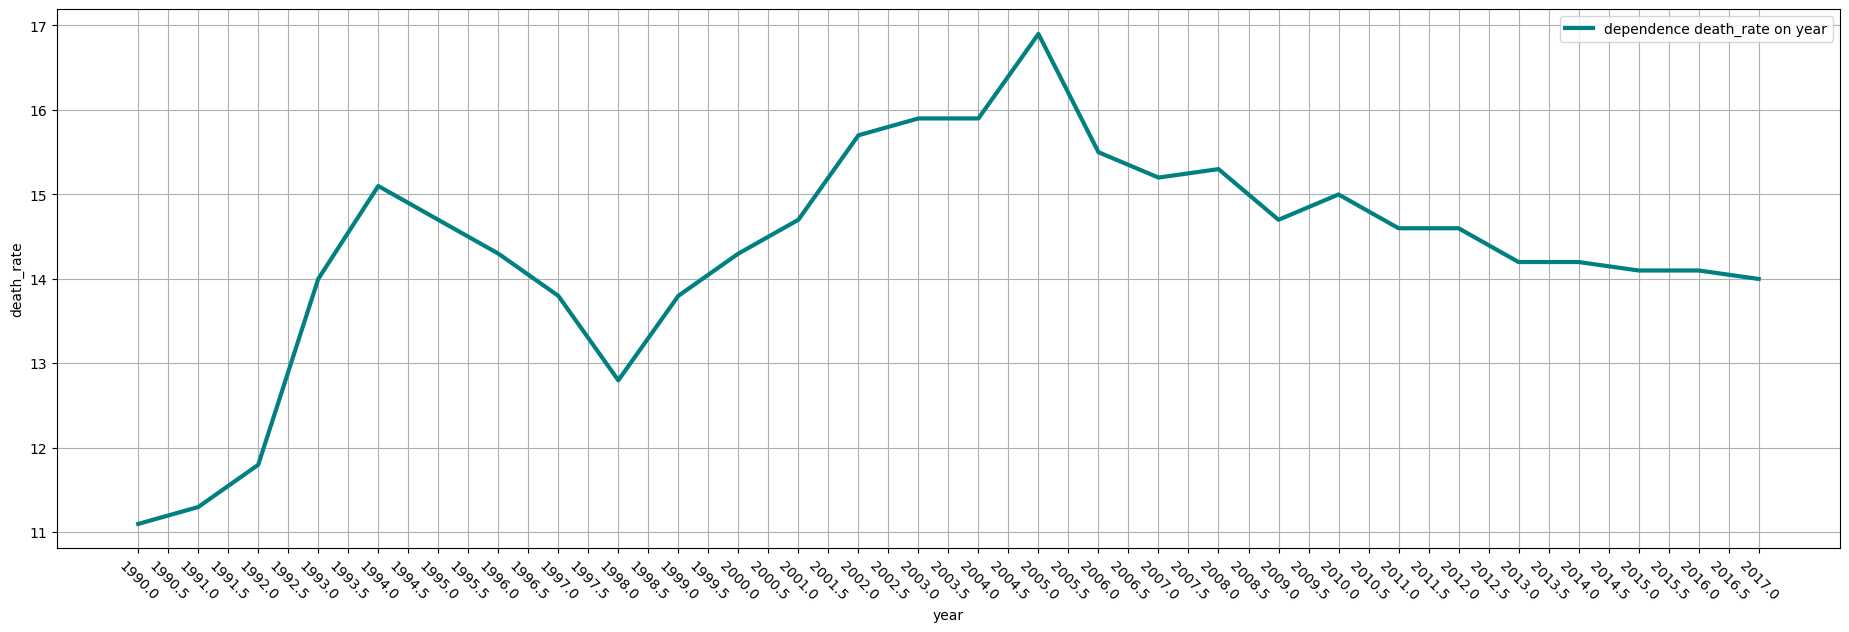

In [18]:
plt.figure(figsize=(23, 7))
plt.plot(years1, values1, label=f"dependence {df.columns[num_column-1]} on year", linewidth=3, color="Teal")
plt.xticks(years1, rotation=315)
plt.xlabel("year")
plt.ylabel(f"{df.columns[num_column-1]}")
plt.grid()
plt.legend()
plt.show()

In [19]:
years2 = [i[0] for i in years]
values2 = values.copy()

28


In [20]:
def quadratic_interpolation(x0, y0, x1, y1, x2, y2, xn):
    a = (y2 - 2*y1 + y0) / ((x2 - x1) * (x2 - x0))
    b = (y1 - y0) / (x1 - x0) - a * (x1 + x0)
    c = y0 - a * x0**2 - b * x0
    yn = a*(xn**2) + b*(xn) + c
    return yn

In [27]:
years3 = []
values3 = []
for i in range(len(years2)-2):
    years3.append(years2[i])
    values3.append(values2[i])
    for j in range(1, 100):
        years3.append(years2[i] + j/100)
        values3.append(quadratic_interpolation(years2[i], values2[i], years2[i+1], values2[i+1], years2[i+2], values2[i+2], years2[i] + j/100))

In [28]:
years3.append(years2[-2])
values3.append(values2[-2])
for j in range(1, 100):
    years3.append(years2[-2] + j/100)
    values3.append(quadratic_interpolation(years2[-3], values2[-3], years2[-2], values2[-2], years2[-1], values2[-1], years2[-2] + j/100))

In [29]:
years3.append(years2[-1])
values3.append(values2[-1])

In [30]:
plt.figure(figsize=(23, 7))
plt.plot(years3, values3, label=f"dependence {df.columns[num_column-1]} on year", linewidth=3, color="Purple")
plt.xticks(years2, rotation=315)
plt.xlabel("year")
plt.ylabel(f"{df.columns[num_column-1]}")
plt.grid()
plt.legend()
plt.show()